# Linear Regression Practice

##### For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa import stattools
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from scipy.stats import probplot

### 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  

To specify our model, we need to use a [patsy formula](https://patsy.readthedocs.io/en/latest/formulas.html). The recipe is `target variable ~ predictor variables`.

We'll use the `ols` function and go ahead and fit the model. (ols = ordinary least squares)

In [5]:
gdp_le = pd.DataFrame(pd.read_csv('../data/gdp_le.csv'))
year_vs_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

####    a. What coefficients do you get? Interpret the meaning of these coefficents.  

In [6]:
year_vs_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

- the formula would fill as: $$Mean(Life\_Expectancy) = -468.138140 + 0.267722(Year)$$ meaning each increase in one unit on average the Life Expectancy increases by ~0.267722 years.  
the intercept is the output value when the input value is 0, so at year 0 there is an estimated life expectancy of -468 years

####    b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can use the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  

In [7]:
lm= smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit() # makes the year 1990 correspond to the value of 0
lm.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

- the estimated average life expectancy for the year 1990 which now corresponds to the value 0 is 64.63 years, and for every unit increase in year there is a 0.268 increase in life expectancy. 

In [8]:
print(lm.summary())
print(f'Breusch-Pagan: {sms.het_breuschpagan(lm.resid, lm.model.exog)}')
print(f'Jarque-Bera: {sms.jarque_bera(lm.resid)}')
print(f'Durbin-Watson: {sms.durbin_watson(lm.resid)}')
print(f'Omnibus: {sms.omni_normtest(lm.resid)}')

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        12:21:38   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.

**Requirements for ols regression** 

- **L**inear relationship between predictors and target mean
- **I**ndependent errors
- **N**ormally distributed residuals
- **E**qual variance in residuals

**Interpretations**  

- because the new model is essentially the same model but shifted so that the year 1990 corresponds with the value of 0, the only difference in the two models is a transposition. The slope coefficient is the same in both models, the intercept is different based on whether the model takes the year 1990 as the value of 1990 or the value of 0.  
- The p-value for the coefficients is near zero which indicates that the coefficients are statistically significant.   

Durbin-Watson = 0.058  

**p-values**  
Breusch-Pagan = 1.62e-23  
Jarque-Bera = 1.34e-102   
Omnibus = 7.5e-85    

- all of the notable statistics' p-values are very near zero, indicating that the residuals does not come from a normal distribution, violating our **L-I-N-E** assumptions for linear regression, meaning we should use caution when interpreting whether the coefficients are statistically significant. 

####    c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

In [9]:
means_per_year = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
means_per_year['mean_estimate'] = lm.predict(means_per_year)
means_per_year.head(5)

,Year,Life_Expectancy,mean_estimate
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


- The model is very close. Values predicted by the model are off by less than a year in most instances. 

####    d. Plot the actual values against your model's estimates for the mean life expectancy.  

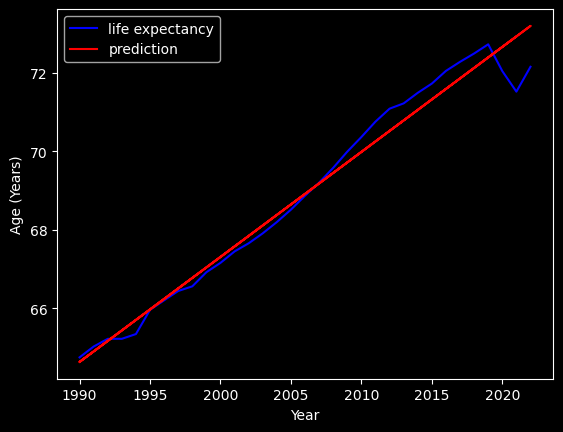

In [10]:
means_per_year.plot(kind = 'line', x= 'Year', y = 'Life_Expectancy', color = 'blue')
plt.plot(gdp_le['Year'], lm.fittedvalues, color = 'red')
plt.ylabel('Age (Years)')
plt.legend(['life expectancy', 'prediction']);

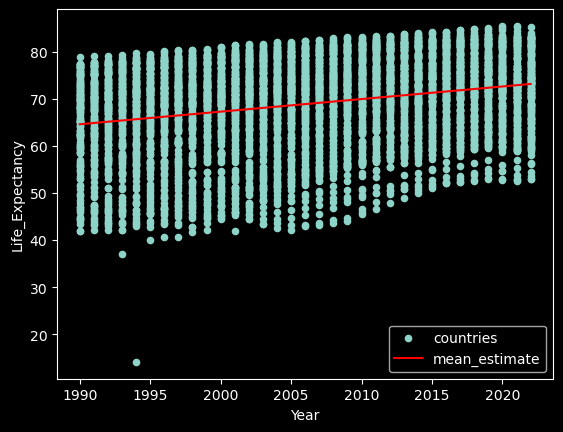

In [11]:
fig, ax = plt.subplots()
gdp_le.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax)
means_per_year.plot(x='Year', y='mean_estimate', ax=ax, color='red')
plt.legend(['countries', 'mean_estimate']);

####    e. Inspect the R-squared value for the model. does it make sense, given the plot?  

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        12:21:38   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(f'variance of residuals = {lm.resid.var()}')
print(f'vairance of Life_Expectancy = {gdp_le['Life_Expectancy'].var()}')

variance of residuals = 82.39711252241113
vairance of Life_Expectancy = 88.74671724809251


**Interpretations**

- The $R^2$ value represents how much of the variability in life epectancy can be explained by the `Year` variable. It's very low because the model is making it's prediction based on the average life expectancy for each year, not all values  for each year. 
- The variance of the residuals is slightly less than the total variance of the dataset, meaning the model does have some predictive power, but it is leaving a great deal of variation unexplained. 

### 2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  

In [14]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021].copy()
lm_2021=smf.ols('Life_Expectancy ~ GDP_Per_Capita', data=gdp_le_2021).fit()

   #### a. What coefficients do you get? Interpret the meaning of those coefficients.  

In [15]:
lm_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

**Interpretation**

For every unit increase ($1) in GDP per capita by an increase in GDP per capita of 1 correspondes to an increase in Life Expectancy of 0.000257 years or ~ 2.25 hours, and when GDP per capita is 0 the life expectancy is approximately 65.95 

####    b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  

In [16]:
lm_2021_adjusted = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data=gdp_le_2021).fit()
lm_2021_adjusted.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

**Interpretation**

Using a log transformation essentially changes the magnitude of our units, meaning one unit increase ($1000) in GDP per capita results in a 0.256892 increase in mean life expectancy. 

####    c. Are the coefficients statistically significant?  

In [17]:
lm_2021_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        12:21:38   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The p-values near zero and the confidence intervals not including 0 indicate that these coefficients are statistically significant, but we'll continue to investigate our assumptions for linear regression.

**QQplot (quantile-quantile plot) - Probplot** 

"Generates a probability plot of sample data against the quantiles of a specified theoretical distribution - normal distribution by default"  

- a straight line (along the red line) represents a perfect fit to the theoretical distribution. 
- what we see in ours appears to be the tails falling short of the theoretical normal distribution, indicating a slight left skew. 

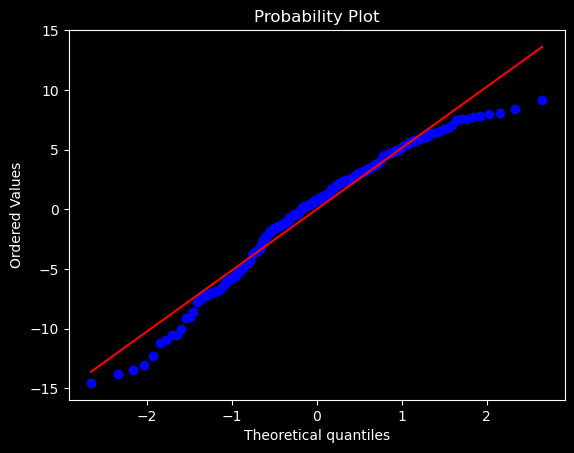

In [18]:
probplot(lm_2021_adjusted.resid, plot=plt);

**Durbin-Watson**

This tests for independence in the data. A value = 2 indicates that the data are independet of eachother. A value < 2 indicates positive autocorrelation of residuals, and a value > 2 indicates negative autocorrelation. Our value of 1.887... indicates slight positive autocorrelation, meaning that if a residual is high, the following residual will likely also be high. 

In [19]:
# are the erros independent? 
sms.durbin_watson(lm_2021_adjusted.resid)

1.8871562368426693

**Normally distributed residuals**

This distribution does not look normal because there is a slight left skew, so that should be cause for concern or adjustment of our data inputs. We can confirm this further by running a Jarque-Bera test for normality on the residuals

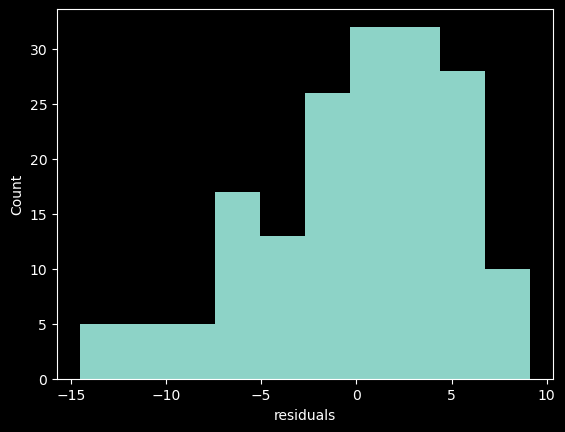

In [20]:
# are the residuals normally distributed? 
plt.hist(lm_2021_adjusted.resid)
plt.xlabel('residuals')
plt.ylabel('Count');

**Jarque-Bera**

A test statistic of 12.7245..., p-value of 0.0017..., skewness of -0.66..., and kurtosis of 2.95... indicate that we should reject the null hypothesis and that the residuals are normally distributed.

In [21]:
# Jarque-Bera test on residuals; output (JBstatistic, p-value, skewness, kurtosis)
sms.jarque_bera(lm_2021_adjusted.resid)

(12.724842533019256,
 0.0017251845192994466,
 -0.6637725985434982,
 2.9459646075602697)

**Breusch-Pagan Test** 

This tests for constant variance in the residuals. The p-value of 0.3097... is relatively high and indicates that we should fail to reject the null hypothesis that the residuals are homoskedastic, and that there is no significant evidence of heteroscedasticity. This in turn means that the variance of the residuals is non-constant, which violates the assumption of constant or equal variance needed for linear regression. 

In [22]:
sms.het_breuschpagan(lm_2021_adjusted.resid, lm_2021_adjusted.model.exog)

(1.032162718064626,
 0.30965124816744033,
 1.0263536925203447,
 0.3124479407320225)

**Conclusions**

All of these results (except the histogram and breusch-pagan test) are shown in the .summary() method from sms. While the p-values for the coefficients indicate statistical significance, the other statistics indicate that the data violates the assumptions that must be made in order to use linear regression. 

####    d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?

In [23]:
predictor = lm_2021_adjusted.params['I(GDP_Per_Capita / 1000)']
intercept = lm_2021_adjusted.params['Intercept']
mean_le_50k = predictor * 50 + intercept
mean_le_100k = predictor * 100 + intercept
[mean_le_50k, mean_le_100k, (mean_le_100k/mean_le_50k)]

[78.7944572464132, 91.63904465544813, 1.163013844601609]

- The country with GDP per capita of $100000 has more than 10 years life expectancy of a country with GDP per Capita of $50000

   #### e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


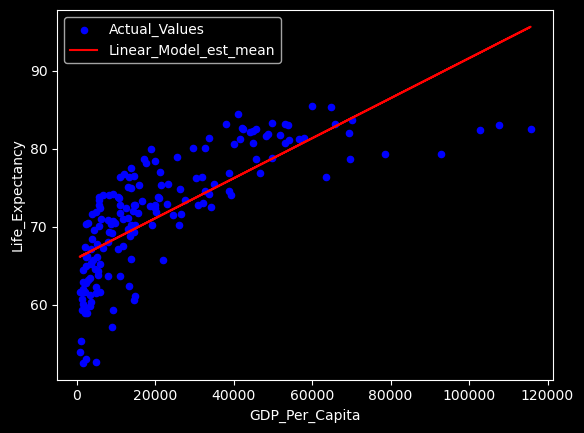

In [24]:
display(gdp_le_2021)
gdp_le_2021.plot(kind = 'scatter', x= 'GDP_Per_Capita', y = 'Life_Expectancy', color = 'blue')
plt.plot(gdp_le_2021['GDP_Per_Capita'], lm_2021_adjusted.fittedvalues, color = 'red')
plt.legend(['Actual_Values', 'Linear_Model_est_mean']);

**Interpretation** 

This model captures the general trend of a positive association between GDP_Per_Capita and Life_Expectancy, but it a very poor fit in its current form. 

### 3. Now, fit a model for life expectancy based on the log of gdp per capita.  

In [25]:
lm_2021_log = smf.ols('Life_Expectancy ~ I(np.log(GDP_Per_Capita))', data=gdp_le_2021).fit()

####    a. Inspect the coefficients for this model. Are they statistically significant?

In [26]:
lm_2021_log.params

Intercept                    18.946970
I(np.log(GDP_Per_Capita))     5.589014
dtype: float64

In [27]:
print(lm_2021_log.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        12:21:39   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**Interpretations** 

The p-value is near zero meaning the coefficients are statistically significant; therefore it is unlikely that the relationship between GDP per capita and life expectancy shown is due to chance. However we will again check out assumptions for linear regression. 

**Requirements for ols regression** 

- **L**inear relationship between predictors and target mean
- **I**ndependent errors
- **N**ormally distributed residuals
- **E**qual variance in residuals   

**Notable Statistics**  
- **Durbin-Watson** = 1.974  *a value near 2 indicates very little autocorrelation in the residuals, indicating independence in errors*  
- **Jarque-Bera** = 18.922, **JB p-value** = 7.78e-05  *a high JB and a near zero p-value indicate that this data did not come from a normal distribution, meaning we'll need to further investigate.  
- **Skew** = -0.725  *this indicates a slight left skew, which is not indicative of a normal distribution*  
- **Kurtosis** = 3.725  *this indicates a leptokurtic distribution, meaning there is an increased likelihood that outliers are impacting the shape of the distribution* 

####    b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000?

- the predicted model is: $$Mean(Life\_Expectancy) = 18.946970 + 5.589014(log(GDP\_Per\_Capita))$$   The intercept of `18.946970` indicates that for a country with zero GDP per capita the life expectancy might be around 19 years, but this doesn't make mathematical sense with a log, and is not very useful to us in determining the relationship between the two variables. What is more useful is seeing that as GDP per capita increases by an order of magnitude so too does the life expectancy: a one unit increase in log(GDP per capita) corresponds to around `5.589014` years increase in Life Expectancy. this is more akin to a percent change in gdp per capita corresponding to life expectancy change. 

In [28]:
predictor = lm_2021_log.params['I(np.log(GDP_Per_Capita))']
intercept = lm_2021_log.params['Intercept']
mean_le_50k_log = predictor * np.log(50000) + intercept
mean_le_100k_log = predictor * np.log(100000) + intercept
[mean_le_50k_log, mean_le_100k_log, (mean_le_100k_log/mean_le_50k_log)]

[79.41886072606525, 83.29286991695194, 1.048779460640327]

- Using the log of GDP per capita, the model predicts a life expectancy of around 79.42 years for a country with a GDP per capita of $50000, and a life expectancy of around 83.3 years for a country with a GDP per capita of $100000. This is around a 5% increase in life expectancy with a doubled GDP per capita

####    c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

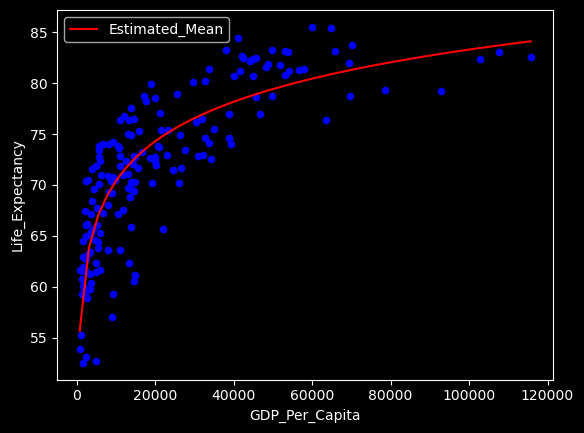

In [29]:
mean_estimates_df = pd.DataFrame({'GDP_Per_Capita' : np.linspace(gdp_le_2021['GDP_Per_Capita'].min(), gdp_le_2021['GDP_Per_Capita'].max())})
mean_estimates_df['Estimated_Mean'] = lm_2021_log.predict(mean_estimates_df)

fig, ax = plt.subplots()
gdp_le_2021.plot(kind = 'scatter', x= 'GDP_Per_Capita', y = 'Life_Expectancy', color = 'blue', ax=ax)
mean_estimates_df.plot(x='GDP_Per_Capita', y='Estimated_Mean', ax=ax, color='red');

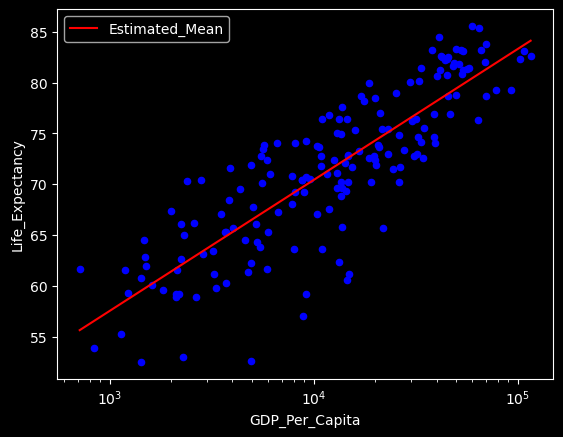

In [30]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind = 'scatter', x= 'GDP_Per_Capita', y = 'Life_Expectancy', color = 'blue', ax=ax, logx=True)
mean_estimates_df.plot(x='GDP_Per_Capita', y='Estimated_Mean', ax=ax, color='red', logx=True);

- this plot looks much better than that of the fit to the non-log-transformed dataset. There is a clear positive association between log(GDP per capita) and life expectancy. 

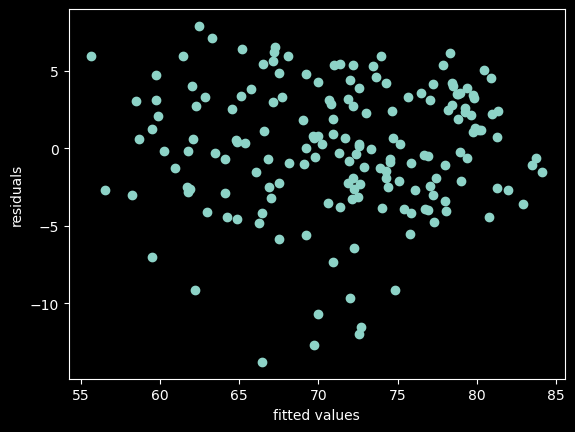

In [31]:
plt.scatter(lm_2021_log.fittedvalues, lm_2021_log.resid)
plt.xlabel('fitted values')
plt.ylabel('residuals');

- no clear pattern in the residuals and a Durbin-Watson score of 1.974 indicates that the errors are nearly independent. 

### 4. Finally, return to the full dataset. 

####    a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.

In [32]:
gdp_le['log_GDP_Per_Capita'] = np.log(gdp_le['GDP_Per_Capita'])
log_gdp_lm= smf.ols("Life_Expectancy ~ log_GDP_Per_Capita", data=gdp_le).fit()

####    b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [33]:
# adding 'Year' to model 
log_gdp_lm_year= smf.ols("Life_Expectancy ~ log_GDP_Per_Capita + I(Year-1990)", data=gdp_le).fit()

In [34]:
log_gdp_lm.params

Intercept             9.194102
log_GDP_Per_Capita    6.531130
dtype: float64

In [35]:
log_gdp_lm_year.params

Intercept             8.561151
log_GDP_Per_Capita    6.359936
I(Year - 1990)        0.134487
dtype: float64

In [36]:
log_gdp_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:21:39   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.1941      0.532     17.297      0.000       8.152      10.236
log_GDP_Per_Capita     6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
log_gdp_lm_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:21:39   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5612      0.517     16.563      0.000       7.548       9.574
log_GDP_Per_Capita     6.3599      0.057    112.387      0.000       6.249       6.471
I(Year - 1990)         0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
means = gdp_le.groupby('Year')[['Life_Expectancy', 'log_GDP_Per_Capita']].mean().reset_index()
means.head(5)

,Year,Life_Expectancy,log_GDP_Per_Capita
0,1990,64.745253,8.837510
1,1991,65.021276,8.834962
2,1992,65.217845,8.844434
3,1993,65.218031,8.838053
4,1994,65.339539,8.828003


In [39]:
display(sms.anova_lm(log_gdp_lm_year, typ=2))
display(sms.anova_lm(log_gdp_lm, log_gdp_lm_year))

,sum_sq,df,F,PR(>F)
log_GDP_Per_Capita,315865.086680,1.0,12630.817342,0.000000e+00
I(Year - 1990),8582.183604,1.0,343.184474,2.273290e-74
Residual,137566.223531,5501.0,NaN,NaN


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5502.0,146148.407135,0.0,NaN,NaN,NaN
1,5501.0,137566.223531,1.0,8582.183604,343.184474,2.273290e-74


- the p-value very near zero in the lower right hand corner indicates that the 'Year' term has a non-zero coefficient, and that the relationship between that predictor variable and the target variable is statistically significant. This means that there is unlikely that the relationship between year and life expectancy is due to chance, though it does not mean direct causation.  
- some limitations this model might have:  
    - the 'Year' as a variable doesn't give us much useful information to use. It is a variable that changes, but does not directly cause anything, but rather serves as an indicator for changes in other variables. So although as years change so does life expectancy, there is really only that observation that can be inferred from the 'Year' predictor.   
    - the 'Year' variable also makes it difficult to determine whether the other predictors are independent, because the data collected is for the same variable changes over time. 
    - this is also not a simple random sample: our observations are not independent of each other. 

# Linear Regression Practice Stretch Questions

### 1. So far, we've looked at the effect of gdp per capita alone on life expectancy. Let's see what happens if we also consider the continent variable. For this question, return to the 2021 subset. 

In [40]:
gdp_le_2021['log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,9.308296
87,Angola,2021,5911.835657,Africa,61.643,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,9.898469
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,8.961943
5377,Vanuatu,2021,2800.493866,Oceania,70.449,7.937551
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,8.637825
5439,Zambia,2021,3236.788981,Africa,61.223,8.082337


 ####    a. Fit a model for life expectancy using log of gdp per capita and continent. How does this compare to the model that just used log of gdp per capita? Interpret the meaning of the coefficients you get with this new model.  

In [41]:
lm_loggdp_continent = smf.ols('Life_Expectancy ~ log_GDP_Per_Capita + Continent', data=gdp_le_2021).fit()
lm_loggdp_continent.params

Intercept                     25.883441
Continent[T.Asia]              5.183673
Continent[T.Europe]            5.104175
Continent[T.North America]     4.175711
Continent[T.Oceania]           4.765647
Continent[T.South America]     2.759830
log_GDP_Per_Capita             4.484066
dtype: float64

In [42]:
lm_loggdp_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     91.22
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           5.93e-50
Time:                        12:21:39   Log-Likelihood:                -473.20
No. Observations:                 173   AIC:                             960.4
Df Residuals:                     166   BIC:                             982.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     25.8834      2.885      8.973      0.000      20.188      31.579
Continent[T.Asia]              5.1837      0.958      5.408      0.000       3.291       7.076
Continent[T.Europe]            5.1042      1.104      4.625      0.000       2.925       7.283
Continent[T.North America]     4.1757      1.083      3.854      0.000       2.037       6.315
Continent[T.Oceania]           4.7656      1.251      3.809      0.000       2.295       7.236
Continent[T.South America]     2.7598      1.367      2.019      0.045       0.060       5.459
log_GDP_Per_Capita             4.4841      0.343     13.056      0.000       3.806       5.162
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.693
Skew:                          -0.298   Prob(JB):                        0.260
Kurtosis:                       2.863   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
sms.anova_lm(lm_loggdp_continent, typ=2)

,sum_sq,df,F,PR(>F)
Continent,523.143417,5.0,7.217054,3.865064e-06
log_GDP_Per_Capita,2471.301130,1.0,170.464858,2.946981e-27
Residual,2406.572195,166.0,NaN,NaN


In [44]:
sms.anova_lm(lm_2021_log, lm_loggdp_continent)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,171.0,2929.715612,0.0,NaN,NaN,NaN
1,166.0,2406.572195,5.0,523.143417,7.217054,0.000004


- the anova test indicates that the role continent plays in life expectancy is unlikely to be due to chance, though it does not have as strong of a direct relationship as GDP per capita. 

####    b. Now, add an interaction term between continent and log gdp per capita. Are the interaction terms statistically significant? Interpret the meaning of the interaction terms.


In [45]:
lm_gdp_continent_interaction = smf.ols('Life_Expectancy ~ log_GDP_Per_Capita + Continent +log_GDP_Per_Capita:Continent', data=gdp_le_2021).fit()
lm_gdp_continent_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           7.75e-47
Time:                        12:21:39   Log-Likelihood:                -469.29
No. Observations:                 173   AIC:                             962.6
Df Residuals:                     161   BIC:                             1000.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        33.6202      5.045      6.664      0.000      23.657      43.583
Continent[T.Asia]                                -4.6179      7.592     -0.608      0.544     -19.610      10.374
Continent[T.Europe]                             -24.9656     11.851     -2.107      0.037     -48.370      -1.561
Continent[T.North America]                       -1.2193     10.428     -0.117      0.907     -21.812      19.373
Continent[T.Oceania]                             -2.4319     11.002     -0.221      0.825     -24.159      19.296
Continent[T.South America]                      -27.9467     32.737     -0.854      0.395     -92.596      36.703
log_GDP_Per_Capita                                3.5449      0.609      5.824      0.000       2.343       4.747
log_GDP_Per_Capita:Continent[T.Asia]              1.1547      0.847      1.364      0.175      -0.518       2.827
log_GDP_Per_Capita:Continent[T.Europe]            3.0839      1.195      2.581      0.011       0.724       5.444
log_GDP_Per_Capita:Continent[T.North America]     0.6996      1.112      0.629      0.530      -1.496       2.895
log_GDP_Per_Capita:Continent[T.Oceania]           0.8781      1.257      0.699      0.486      -1.603       3.360
log_GDP_Per_Capita:Continent[T.South America]     3.3185      3.403      0.975      0.331      -3.403      10.040
==============================================================================
Omnibus:                        1.067   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.869
Skew:                          -0.172   Prob(JB):                        0.648
Kurtosis:                       3.053   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
lm_loggdp_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     91.22
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           5.93e-50
Time:                        12:21:39   Log-Likelihood:                -473.20
No. Observations:                 173   AIC:                             960.4
Df Residuals:                     166   BIC:                             982.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     25.8834      2.885      8.973      0.000      20.188      31.579
Continent[T.Asia]              5.1837      0.958      5.408      0.000       3.291       7.076
Continent[T.Europe]            5.1042      1.104      4.625      0.000       2.925       7.283
Continent[T.North America]     4.1757      1.083      3.854      0.000       2.037       6.315
Continent[T.Oceania]           4.7656      1.251      3.809      0.000       2.295       7.236
Continent[T.South America]     2.7598      1.367      2.019      0.045       0.060       5.459
log_GDP_Per_Capita             4.4841      0.343     13.056      0.000       3.806       5.162
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.693
Skew:                          -0.298   Prob(JB):                        0.260
Kurtosis:                       2.863   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
sms.anova_lm(lm_loggdp_continent, lm_gdp_continent_interaction)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,166.0,2406.572195,0.0,NaN,NaN,NaN
1,161.0,2300.287864,5.0,106.284331,1.487794,0.196592


- the interaction terms specify that the relationship between life expectancy and GDP per capita may be different depending on which continent the measurement is on. 
- in this case, none of the interaction terms appear to be statistically significant, meaning it is unlikely that the continent has a significant effect on how GDP per capita corresponds to life expectancy. 

### 2. The data that we are working with is time series data, which means that it contains measurements of the same variable collected over time. This can lead to violations of the linear regression model assumptions. Namely, the errors may not be independent. Let's investigate further and see how this could be corrected by restructuring our model.  


####    a. Fit a linear regression model with target being gdp per capita and predictor being year using just the data for the United States.


In [48]:
# Extract USA data
us_data = gdp_le[gdp_le['Country'] == 'United States'].sort_values('Year').copy()
# fit model to US data
lm_us_gdp_year = smf.ols('GDP_Per_Capita ~ Year', data=us_data).fit()

####    b. Inspect the residuals for this model. Look at the correlation between the residual for a given year and the residual for the next year. Is there a statistically significant correlation?


In [49]:
lm_us_gdp_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     743.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           3.17e-23
Time:                        12:21:40   Log-Likelihood:                -286.45
No. Observations:                  33   AIC:                             576.9
Df Residuals:                      31   BIC:                             579.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.416e+06   5.39e+04    -26.284      0.000   -1.53e+06   -1.31e+06
Year         732.2508     26.863     27.258      0.000     677.462     787.039
==============================================================================
Omnibus:                        2.995   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.165
Skew:                           0.457   Prob(JB):                        0.339
Kurtosis:                       2.140   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

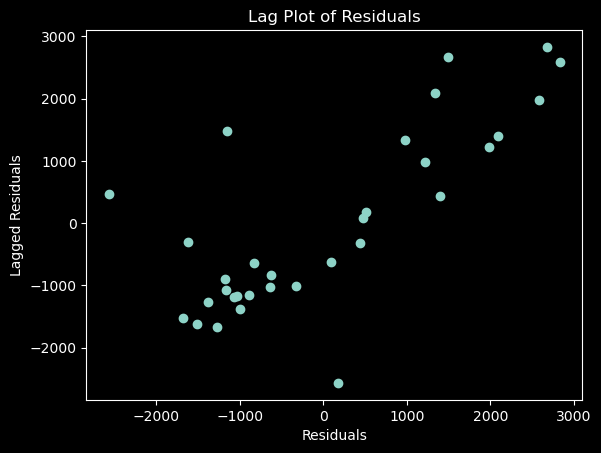

In [50]:
# add residuals to dataset and shift so they can be plotted against each other
residuals = lm_us_gdp_year.resid
us_data['residuals'] = residuals
us_data['lag_residuals'] = residuals.shift(1)

# Plot residuals vs. lagged residuals
plt.scatter(us_data['residuals'], us_data['lag_residuals'])
plt.xlabel('Residuals')
plt.ylabel('Lagged Residuals')
plt.title('Lag Plot of Residuals')
plt.show()

- the Durbin-Watson test is used to evaluate autocorrelation on a scale of 0-4, with values closer to 0 indication a stronger positive correlation, values closer to 4 indicating a stronger negative correlation, and values closer to 2 indicating less autocorrelation. The Durbin-Watson value of `0.488` indicates a strong positive correlation between the residuals of one year and the residuals of the following year.  
- this is also present when plotted: the positive linear trend is apparent, again indicating some correlation between the years and succeeding years. 

####    c. A common technique for modeling time series data is the [ARIMA model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average). For an in-depth discussion of ARIMA models, see https://otexts.com/fpp2/arima.html. The first thing to check is whether we have a stationary series. This can be done using the [Augmented Dickey-Fuller test](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html). We want to reject the null hypothesis before we proceed, because failing to reject implies that the series is not stationary. Run the adfuller test on the gdp per capita values for the US.

In [51]:
sm.tsa.stattools.adfuller(us_data['GDP_Per_Capita'])

(-0.33987640208395214,
 0.9196636871272641,
 0,
 32,
 {'1%': -3.653519805908203,
  '5%': -2.9572185644531253,
  '10%': -2.6175881640625},
 375.72874308092764)

- the p-value is 0.9197... which is fairly high, meaning we will fail to reject the null hypothesis and say that this indicates that our data is **not stationary**. 

####    d. If a series is not stationary, it can be replaced by the series of differences from one time period to the next. See if the series of differences in stationary. Plot the series of differences and run the adfuller test.


In [52]:
# differencing 
us_data['diff_resid'] = us_data['lag_residuals']-us_data['residuals']
us_data = us_data.dropna()
us_data.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_GDP_Per_Capita,residuals,lag_residuals,diff_resid
5308,United States,1991,39871.342964,North America,75.365854,10.593413,-1620.244536,-307.838294,1312.406242
5307,United States,1992,40707.290631,North America,75.617073,10.614162,-1516.547671,-1620.244536,-103.696865
5306,United States,1993,41279.516502,North America,75.419512,10.628122,-1676.572601,-1516.547671,160.024930
5305,United States,1994,42419.195365,North America,75.619512,10.655356,-1269.144539,-1676.572601,-407.428062
5304,United States,1995,43042.213822,North America,75.621951,10.669937,-1378.376883,-1269.144539,109.232344


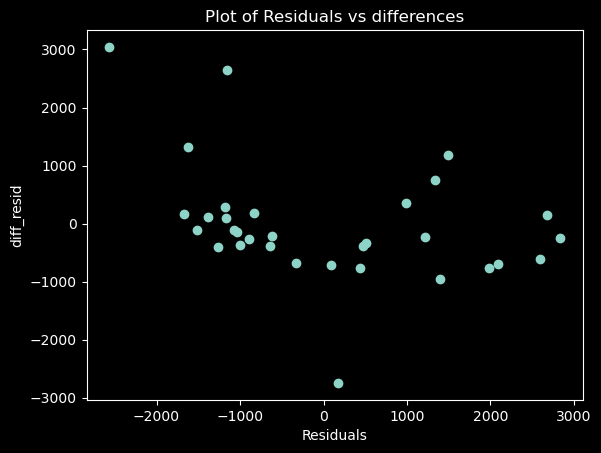

In [53]:
# Plot residuals vs. lagged residuals
plt.scatter(us_data['residuals'], us_data['diff_resid'])
plt.xlabel('Residuals')
plt.ylabel('diff_resid')
plt.title('Plot of Residuals vs differences')
plt.show()

In [54]:
sm.tsa.stattools.adfuller(us_data['diff_resid'])

(-6.1707067135750515,
 6.816357604819705e-08,
 0,
 31,
 {'1%': -3.661428725118324,
  '5%': -2.960525341210433,
  '10%': -2.6193188033298647},
 358.78074070970894)

- the differencing plot shows nearly no trend in the data; maybe there could be an argument for some linear trend, but the adjusted Dickey-Fuller test shows a p-value of near zero, indicating that this dataset is stationary. 

####    e. Since the series of differences is stationary, we know that we need an integration term of 1. You also want to check the autocorrelation function, which can be done using the [plot_acf function](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf). Are there any significant autocorrelations? 


In the context of time series analysis, particularly when discussing stationarity and differencing, an `integration term` refers to the number of times a time series must be differenced to make it stationary. This concept is often used in the context of ARIMA models (AutoRegressive Integrated Moving Average), where the "I" in ARIMA stands for "Integrated", representing the number of differencing operations applied to the series.

####    f. Since there were not significant autocorrelations, an ARIMA(0,1,0) model may be appropriate. Try fitting an ARIMA(0,1,0) model using https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA. Try one with no trend and one with a linear trend (using the trend parameter). Compare these models on the basis of the [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion). Which does better?


####    g. Compare the estimate and confidence interval for the trend from the ordinary least squares regression model and the ARIMA model. Which has a greater standard error?


### 3. Another way that we can model our data is using [fixed effects](https://theeffectbook.net/ch-FixedEffects.html), which allows us to control for all variables, whether they are observed or not. Let's say we want to isolate the effect of gdp per capita on life expectancy, after controlling for differences between countries. 


####    a. One way to do this is to fit a model which contains a dummy variable for each country. Do this and inspect the coefficient for log gdp per capita.


####    b. A second option is to convert our original variables (log gdp per capita and life expectancy) to the difference from the country-level mean for these varaiables. Hint: you may want to use groupby + transform in order to find the difference from the country-level mean for the variables. How does the coefficient for log gdp per capita compare to the one using a dummy variable for each country? 


### 4. Finally, when working with panel data, it is common to use a linear mixed model. A good resource on mixed models is this set of course notes from Penn State University: https://online.stat.psu.edu/stat502_fa21/lesson/6 or Chapters 8 and 9 of [Beyond Multiple Linear Regression](https://bookdown.org/roback/bookdown-BeyondMLR/ch-multilevelintro.html).  


####    a. Fit a model for just the united states with predictor variable Year and target life expectancy. Inspect the parameters.  


####    b. Then iterate through all countries and gather up the parameters. Look at the distribution of model parameters across all countries.

  
####    c. Find the correlation between slope and intercept. What might this suggest?  


####    d. Group by continent and look at the distribution of slopes and intercepts. What do you notice?  


####    e. Using [mixedlm](https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html) from statsmodels, fit a linear mixed effects model with groups being the country and random effects the year and log gdp per capita. Inspect the results and compare them to what you noticed above.  